In [1]:
%load_ext autoreload
%autoreload 2s

In [1]:
import sys
sys.path.append('../src')
import tensorflow as tf
import tensorflow.keras as k
import pandas as pd
import numpy as np
import test_submit
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
train = pd.read_pickle('../inputs/dataset/train.pkl')
investment_id = train.pop('investment_id')
y = train.pop('target')

In [4]:
pd.read_pickle('../inputs/dataset/train.pkl').describe().T

,count,mean,std,min,25%,50%,75%,max
investment_id,3141410.0,1885.265159,1083.615850,0.000000,952.000000,1882.000000,2830.000000,3773.000000
time_id,3141410.0,665.486238,356.043409,0.000000,353.000000,704.000000,975.000000,1219.000000
f_0,3141410.0,0.000000,0.000000,-17.656250,-0.407227,0.243164,0.665039,7.843750
f_1,3141410.0,-0.000000,0.000000,-6.578125,-0.681152,-0.048676,0.608887,8.710938
f_2,3141410.0,0.000000,0.000000,-8.640625,-0.653320,0.043518,0.658691,8.007812
...,...,...,...,...,...,...,...,...
f_296,3141410.0,-0.000000,0.000000,-7.367188,-0.957520,0.006954,0.950195,7.679688
f_297,3141410.0,-0.000000,0.000000,-7.578125,-0.724121,-0.165039,0.609863,12.421875
f_298,3141410.0,-0.000000,0.000000,-6.707031,-0.816406,0.023010,0.798340,7.003906
f_299,3141410.0,-0.000000,0.000000,-10.281250,-0.507812,-0.282471,0.141113,43.375000


In [18]:
# investment_ids = list(investment_id.unique())
# investment_id_size = len(investment_ids) + 1
# investment_id_lookup_layer = k.layers.IntegerLookup(max_tokens=investment_id_size)
# investment_id_lookup_layer.adapt(pd.DataFrame({"investment_ids":investment_ids}))

In [77]:
features = [f'f_{i}' for i in range(300)]
batch_size = 1024
epochs = 30

def get_model():
    # activation = 'relu'
    # kernel_regularizer = None
    activation = 'swish'
    kernel_regularizer = 'l2'

    # investment_id_inputs = tf.keras.Input((1, ), dtype=tf.uint16)
    # investment_id_x = investment_id_lookup_layer(investment_id_inputs)
    # investment_id_x = k.layers.Embedding(investment_id_size, 32, input_length=1)(investment_id_x)
    # investment_id_x = k.layers.Reshape((-1, ))(investment_id_x)
    # investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    # investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    # investment_id_x = k.layers.Dense(64, activation=activation)(investment_id_x)
    


    feature_inputs = k.Input((300,), dtype=tf.float16)
    feature_x = k.layers.Dense(64, activation=activation)(feature_inputs)
    # feature_x = k.layers.Dense(256, activation=activation)(feature_x)
    feature_x = k.layers.Dropout(.5)(feature_x)
    feature_x = k.layers.Dense(16, activation=activation)(feature_x)
    feature_x = k.layers.Dropout(.5)(feature_x)

    # feature_x = k.layers.Dropout(.5)(feature_x)
        
    # x = k.layers.Concatenate(axis=1)([investment_id_x, feature_x])
    # x = k.layers.Dense(512, activation=activation, kernel_regularizer=kernel_regularizer)(x)
    # x = k.layers.Dense(128, activation=activation, kernel_regularizer=kernel_regularizer)(x)
    # x = k.layers.Dense(32, activation=activation, kernel_regularizer=kernel_regularizer)(x)

    # output = k.layers.Dense(1, activation='sigmoid')(x)
    # output = k.layers.Dense(1)(x)
    # model = k.Model(inputs=[investment_id_inputs, feature_inputs], outputs=[output])
    # model.compile(optimizer=k.optimizers.Adam(0.001), loss='mse', metrics=['mse', 'mae', 'mape'])

    output = k.layers.Dense(1)(feature_x)
    model = k.Model(inputs=[feature_inputs], outputs=[output])
    model.compile(optimizer=k.optimizers.Adam(), loss='mse', metrics=['mse', 'mae', 'mape'])


    return model

def eval(model):
    return test_submit.eval(lambda test: model.predict(test[features]))

def make_dataset(feature, y, investment_id, mode="train"):
    # ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature), y))
    ds = tf.data.Dataset.from_tensor_slices((feature, y))
    if mode == "train":
        ds = ds.shuffle(4096)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds


def get_callbacks(i):
    checkpoint = k.callbacks.ModelCheckpoint(f'../outputs/models/my_simple_nn_{i}', save_best_only=True)
    earlystopping = k.callbacks.EarlyStopping(patience=10)
    return [checkpoint, earlystopping]


In [78]:
# model = get_model()
# model.summary()
# k.utils.plot_model(model, show_shapes=True)

Epoch 1/30
2455/2455 [==============================] - 6s 2ms/step - loss: 0.8725 - mse: 0.8725 - mae: 0.6429 - mape: 142845.6094 - val_loss: 0.8384 - val_mse: 0.8384 - val_mae: 0.6302 - val_mape: 92054.9531
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 2/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8352 - mse: 0.8352 - mae: 0.6262 - mape: 99002.8125 - val_loss: 0.8360 - val_mse: 0.8360 - val_mae: 0.6285 - val_mape: 105743.6875
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 3/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8327 - mse: 0.8327 - mae: 0.6251 - mape: 105066.8672 - val_loss: 0.8352 - val_mse: 0.8352 - val_mae: 0.6284 - val_mape: 124835.2500
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 4/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8320 - mse: 0.8320 - mae: 0.6248 - mape: 100508.1172 - val_loss: 0.8351 - val_mse: 0.8351 - val_mae: 0.6285 - val_mape: 98999.9375
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 5/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8311 - mse: 0.8311 - mae: 0.6245 - mape: 103022.4609 - val_loss: 0.8340 - val_mse: 0.8340 - val_mae: 0.6276 - val_mape: 152602.2500
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 6/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8303 - mse: 0.8303 - mae: 0.6242 - mape: 96320.0156 - val_loss: 0.8336 - val_mse: 0.8336 - val_mae: 0.6277 - val_mape: 127643.1953
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 7/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8297 - mse: 0.8297 - mae: 0.6239 - mape: 108563.7109 - val_loss: 0.8337 - val_mse: 0.8337 - val_mae: 0.6279 - val_mape: 111856.2891
Epoch 8/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8293 - mse: 0.8293 - mae: 0.6238 - mape: 105997.2266 - val_loss: 0.8335 - val_mse: 0.8335 - val_mae: 0.6280 - val_mape: 106676.8359
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 9/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8291 - mse: 0.8291 - mae: 0.6238 - mape: 109209.5391 - val_loss: 0.8330 - val_mse: 0.8330 - val_mae: 0.6272 - val_mape: 103079.4219
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 10/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8286 - mse: 0.8286 - mae: 0.6236 - mape: 113007.5781 - val_loss: 0.8334 - val_mse: 0.8334 - val_mae: 0.6277 - val_mape: 133790.7656
Epoch 11/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8284 - mse: 0.8284 - mae: 0.6235 - mape: 109689.5781 - val_loss: 0.8330 - val_mse: 0.8330 - val_mae: 0.6273 - val_mape: 118449.3203
Epoch 12/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8281 - mse: 0.8281 - mae: 0.6234 - mape: 106135.5000 - val_loss: 0.8327 - val_mse: 0.8327 - val_mae: 0.6275 - val_mape: 142327.9375
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 13/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8277 - mse: 0.8277 - mae: 0.6232 - mape: 109304.8828 - val_loss: 0.8331 - val_mse: 0.8331 - val_mae: 0.6278 - val_mape: 116747.4688
Epoch 14/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8275 - mse: 0.8275 - mae: 0.6232 - mape: 107563.2969 - val_loss: 0.8321 - val_mse: 0.8321 - val_mae: 0.6272 - val_mape: 121803.7422
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 15/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8272 - mse: 0.8272 - mae: 0.6231 - mape: 114175.9297 - val_loss: 0.8327 - val_mse: 0.8327 - val_mae: 0.6275 - val_mape: 122983.6484
Epoch 16/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8272 - mse: 0.8272 - mae: 0.6231 - mape: 111572.7969 - val_loss: 0.8320 - val_mse: 0.8320 - val_mae: 0.6274 - val_mape: 108769.5938
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 17/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8270 - mse: 0.8270 - mae: 0.6230 - mape: 112318.6406 - val_loss: 0.8325 - val_mse: 0.8325 - val_mae: 0.6274 - val_mape: 117080.0078
Epoch 18/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8270 - mse: 0.8270 - mae: 0.6230 - mape: 103636.4531 - val_loss: 0.8310 - val_mse: 0.8310 - val_mae: 0.6269 - val_mape: 133605.2500
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_0/assets


Epoch 19/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8268 - mse: 0.8268 - mae: 0.6231 - mape: 113751.3359 - val_loss: 0.8320 - val_mse: 0.8320 - val_mae: 0.6271 - val_mape: 110517.6172
Epoch 20/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8264 - mse: 0.8264 - mae: 0.6228 - mape: 106082.8438 - val_loss: 0.8325 - val_mse: 0.8325 - val_mae: 0.6276 - val_mape: 127340.2500
Epoch 21/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8264 - mse: 0.8264 - mae: 0.6229 - mape: 101458.2891 - val_loss: 0.8321 - val_mse: 0.8321 - val_mae: 0.6276 - val_mape: 119960.5781
Epoch 22/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8262 - mse: 0.8262 - mae: 0.6228 - mape: 104879.1797 - val_loss: 0.8325 - val_mse: 0.8325 - val_mae: 0.6276 - val_mape: 88652.4219
Epoch 23/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8262 - mse: 0.8262 - mae: 0.6229 - mape: 109300.9062 - val_loss: 0.8322 - val_

Pearson: (0.14096166878168978, 0.0)


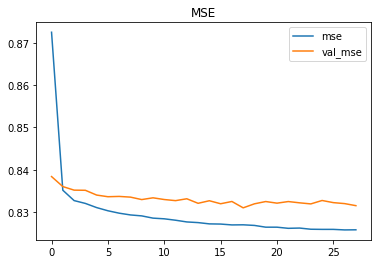

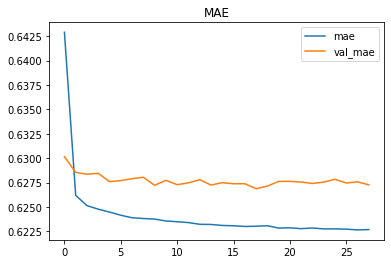

Epoch 1/30
2455/2455 [==============================] - 6s 2ms/step - loss: 0.8785 - mse: 0.8785 - mae: 0.6461 - mape: 110384.1094 - val_loss: 0.8412 - val_mse: 0.8412 - val_mae: 0.6308 - val_mape: 75923.6797
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 2/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8365 - mse: 0.8365 - mae: 0.6265 - mape: 93951.2891 - val_loss: 0.8398 - val_mse: 0.8398 - val_mae: 0.6294 - val_mape: 102063.9219
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 3/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8335 - mse: 0.8335 - mae: 0.6254 - mape: 108245.4531 - val_loss: 0.8386 - val_mse: 0.8386 - val_mae: 0.6292 - val_mape: 99471.5469
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 4/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8321 - mse: 0.8321 - mae: 0.6249 - mape: 101512.6328 - val_loss: 0.8384 - val_mse: 0.8384 - val_mae: 0.6290 - val_mape: 109617.8516
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 5/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8312 - mse: 0.8312 - mae: 0.6246 - mape: 114860.2656 - val_loss: 0.8377 - val_mse: 0.8377 - val_mae: 0.6286 - val_mape: 115113.9062
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 6/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8305 - mse: 0.8305 - mae: 0.6243 - mape: 104111.5547 - val_loss: 0.8381 - val_mse: 0.8381 - val_mae: 0.6292 - val_mape: 95203.1562
Epoch 7/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8299 - mse: 0.8299 - mae: 0.6241 - mape: 103990.7734 - val_loss: 0.8376 - val_mse: 0.8376 - val_mae: 0.6290 - val_mape: 89805.1406
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 8/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8292 - mse: 0.8292 - mae: 0.6239 - mape: 109214.8984 - val_loss: 0.8382 - val_mse: 0.8382 - val_mae: 0.6293 - val_mape: 106035.1250
Epoch 9/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8290 - mse: 0.8290 - mae: 0.6238 - mape: 99715.5312 - val_loss: 0.8384 - val_mse: 0.8384 - val_mae: 0.6295 - val_mape: 118228.4062
Epoch 10/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8287 - mse: 0.8287 - mae: 0.6237 - mape: 97750.4375 - val_loss: 0.8385 - val_mse: 0.8385 - val_mae: 0.6295 - val_mape: 82071.3984
Epoch 11/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8285 - mse: 0.8285 - mae: 0.6236 - mape: 102550.1641 - val_loss: 0.8371 - val_mse: 0.8371 - val_mae: 0.6288 - val_mape: 100383.1484
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 12/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8281 - mse: 0.8281 - mae: 0.6235 - mape: 104174.7812 - val_loss: 0.8371 - val_mse: 0.8371 - val_mae: 0.6289 - val_mape: 101014.4766
Epoch 13/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8280 - mse: 0.8280 - mae: 0.6234 - mape: 86837.6562 - val_loss: 0.8373 - val_mse: 0.8373 - val_mae: 0.6288 - val_mape: 75866.2422
Epoch 14/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8276 - mse: 0.8276 - mae: 0.6233 - mape: 92989.7969 - val_loss: 0.8356 - val_mse: 0.8356 - val_mae: 0.6281 - val_mape: 78148.3828
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_1/assets


Epoch 15/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8277 - mse: 0.8277 - mae: 0.6234 - mape: 99847.0703 - val_loss: 0.8366 - val_mse: 0.8366 - val_mae: 0.6288 - val_mape: 91435.2734
Epoch 16/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8272 - mse: 0.8272 - mae: 0.6232 - mape: 98197.2812 - val_loss: 0.8365 - val_mse: 0.8365 - val_mae: 0.6285 - val_mape: 99859.9375
Epoch 17/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8275 - mse: 0.8275 - mae: 0.6232 - mape: 101046.3281 - val_loss: 0.8367 - val_mse: 0.8367 - val_mae: 0.6286 - val_mape: 90227.5234
Epoch 18/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8269 - mse: 0.8269 - mae: 0.6231 - mape: 110317.7578 - val_loss: 0.8364 - val_mse: 0.8364 - val_mae: 0.6282 - val_mape: 97922.7578
Epoch 19/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8269 - mse: 0.8269 - mae: 0.6232 - mape: 101045.1250 - val_loss: 0.8362 - val_mse: 

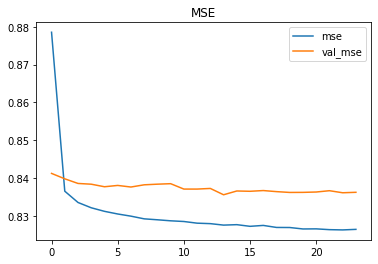

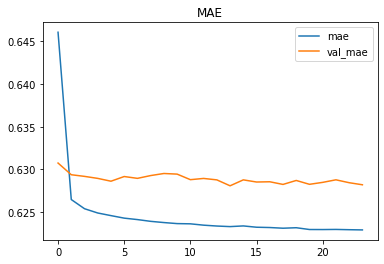

Epoch 1/30
2455/2455 [==============================] - 6s 2ms/step - loss: 0.8813 - mse: 0.8813 - mae: 0.6471 - mape: 134711.3125 - val_loss: 0.8340 - val_mse: 0.8340 - val_mae: 0.6281 - val_mape: 100408.0312
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 2/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8352 - mse: 0.8352 - mae: 0.6260 - mape: 104157.7969 - val_loss: 0.8331 - val_mse: 0.8331 - val_mae: 0.6281 - val_mape: 122417.0859
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 3/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8333 - mse: 0.8333 - mae: 0.6253 - mape: 104462.2344 - val_loss: 0.8323 - val_mse: 0.8323 - val_mae: 0.6282 - val_mape: 116415.9453
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 4/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8326 - mse: 0.8326 - mae: 0.6250 - mape: 104016.8359 - val_loss: 0.8323 - val_mse: 0.8323 - val_mae: 0.6277 - val_mape: 123711.7500
Epoch 5/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8319 - mse: 0.8319 - mae: 0.6247 - mape: 111515.9609 - val_loss: 0.8307 - val_mse: 0.8307 - val_mae: 0.6269 - val_mape: 133580.1719
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 6/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8313 - mse: 0.8313 - mae: 0.6245 - mape: 105460.8125 - val_loss: 0.8311 - val_mse: 0.8311 - val_mae: 0.6270 - val_mape: 133701.0938
Epoch 7/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8309 - mse: 0.8309 - mae: 0.6244 - mape: 105938.1797 - val_loss: 0.8309 - val_mse: 0.8309 - val_mae: 0.6273 - val_mape: 115662.9453
Epoch 8/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8303 - mse: 0.8303 - mae: 0.6242 - mape: 109201.0859 - val_loss: 0.8304 - val_mse: 0.8304 - val_mae: 0.6271 - val_mape: 120353.8125
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 9/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8300 - mse: 0.8300 - mae: 0.6241 - mape: 114720.5078 - val_loss: 0.8306 - val_mse: 0.8306 - val_mae: 0.6271 - val_mape: 121294.6875
Epoch 10/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8295 - mse: 0.8295 - mae: 0.6239 - mape: 115006.4688 - val_loss: 0.8309 - val_mse: 0.8309 - val_mae: 0.6274 - val_mape: 118777.9375
Epoch 11/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8295 - mse: 0.8295 - mae: 0.6240 - mape: 115014.8672 - val_loss: 0.8303 - val_mse: 0.8303 - val_mae: 0.6273 - val_mape: 125612.9219
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 12/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8292 - mse: 0.8292 - mae: 0.6238 - mape: 112396.1562 - val_loss: 0.8298 - val_mse: 0.8298 - val_mae: 0.6273 - val_mape: 94387.4844
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 13/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8286 - mse: 0.8286 - mae: 0.6236 - mape: 111772.8281 - val_loss: 0.8296 - val_mse: 0.8296 - val_mae: 0.6271 - val_mape: 130193.6562
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 14/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8285 - mse: 0.8285 - mae: 0.6237 - mape: 109559.1406 - val_loss: 0.8299 - val_mse: 0.8299 - val_mae: 0.6272 - val_mape: 101719.7656
Epoch 15/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8284 - mse: 0.8284 - mae: 0.6237 - mape: 119902.6953 - val_loss: 0.8293 - val_mse: 0.8293 - val_mae: 0.6264 - val_mape: 125685.8047
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 16/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8282 - mse: 0.8282 - mae: 0.6235 - mape: 113090.0000 - val_loss: 0.8302 - val_mse: 0.8302 - val_mae: 0.6271 - val_mape: 95334.0000
Epoch 17/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8280 - mse: 0.8280 - mae: 0.6235 - mape: 110347.4609 - val_loss: 0.8290 - val_mse: 0.8290 - val_mae: 0.6265 - val_mape: 91925.0781
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 18/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8276 - mse: 0.8276 - mae: 0.6233 - mape: 109052.0469 - val_loss: 0.8289 - val_mse: 0.8289 - val_mae: 0.6266 - val_mape: 105794.0234
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 19/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8275 - mse: 0.8275 - mae: 0.6234 - mape: 111277.3125 - val_loss: 0.8284 - val_mse: 0.8284 - val_mae: 0.6263 - val_mape: 126622.4531
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_2/assets


Epoch 20/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8274 - mse: 0.8274 - mae: 0.6233 - mape: 120013.8125 - val_loss: 0.8292 - val_mse: 0.8292 - val_mae: 0.6263 - val_mape: 112041.6328
Epoch 21/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8273 - mse: 0.8273 - mae: 0.6234 - mape: 116648.0469 - val_loss: 0.8289 - val_mse: 0.8289 - val_mae: 0.6266 - val_mape: 88243.8438
Epoch 22/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8271 - mse: 0.8271 - mae: 0.6233 - mape: 123337.9453 - val_loss: 0.8286 - val_mse: 0.8286 - val_mae: 0.6265 - val_mape: 103681.0000
Epoch 23/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8268 - mse: 0.8268 - mae: 0.6232 - mape: 116449.3750 - val_loss: 0.8293 - val_mse: 0.8293 - val_mae: 0.6269 - val_mape: 106977.7969
Epoch 24/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8270 - mse: 0.8270 - mae: 0.6233 - mape: 110100.8594 - val_loss: 0.8286 - val_

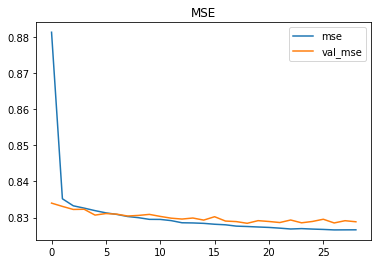

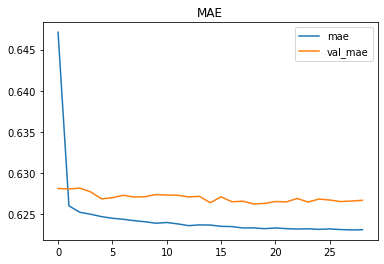

Epoch 1/30
2455/2455 [==============================] - 6s 2ms/step - loss: 0.8788 - mse: 0.8788 - mae: 0.6457 - mape: 132400.1719 - val_loss: 0.8387 - val_mse: 0.8387 - val_mae: 0.6291 - val_mape: 91609.8672
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 2/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8362 - mse: 0.8362 - mae: 0.6266 - mape: 97765.9141 - val_loss: 0.8362 - val_mse: 0.8362 - val_mae: 0.6277 - val_mape: 106567.3828
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 3/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8335 - mse: 0.8335 - mae: 0.6255 - mape: 110842.6406 - val_loss: 0.8356 - val_mse: 0.8356 - val_mae: 0.6274 - val_mape: 114448.2188
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 4/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8321 - mse: 0.8321 - mae: 0.6251 - mape: 112949.6797 - val_loss: 0.8358 - val_mse: 0.8358 - val_mae: 0.6278 - val_mape: 99623.6562
Epoch 5/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8313 - mse: 0.8313 - mae: 0.6247 - mape: 118098.0156 - val_loss: 0.8344 - val_mse: 0.8344 - val_mae: 0.6274 - val_mape: 111043.3906
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 6/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8305 - mse: 0.8305 - mae: 0.6244 - mape: 113701.4141 - val_loss: 0.8340 - val_mse: 0.8340 - val_mae: 0.6270 - val_mape: 125746.9062
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 7/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8300 - mse: 0.8300 - mae: 0.6242 - mape: 113438.8906 - val_loss: 0.8341 - val_mse: 0.8341 - val_mae: 0.6274 - val_mape: 116423.7812
Epoch 8/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8297 - mse: 0.8297 - mae: 0.6241 - mape: 114390.6250 - val_loss: 0.8335 - val_mse: 0.8335 - val_mae: 0.6269 - val_mape: 101787.2188
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 9/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8294 - mse: 0.8294 - mae: 0.6240 - mape: 114525.7734 - val_loss: 0.8338 - val_mse: 0.8338 - val_mae: 0.6269 - val_mape: 105001.9531
Epoch 10/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8288 - mse: 0.8288 - mae: 0.6239 - mape: 117770.3984 - val_loss: 0.8328 - val_mse: 0.8328 - val_mae: 0.6264 - val_mape: 107872.2734
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 11/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8290 - mse: 0.8290 - mae: 0.6239 - mape: 118526.8906 - val_loss: 0.8330 - val_mse: 0.8330 - val_mae: 0.6269 - val_mape: 96520.0312
Epoch 12/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8284 - mse: 0.8284 - mae: 0.6237 - mape: 116294.0469 - val_loss: 0.8328 - val_mse: 0.8328 - val_mae: 0.6267 - val_mape: 109060.5859
Epoch 13/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8284 - mse: 0.8284 - mae: 0.6238 - mape: 116619.0234 - val_loss: 0.8328 - val_mse: 0.8328 - val_mae: 0.6265 - val_mape: 94606.8516
Epoch 14/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8281 - mse: 0.8281 - mae: 0.6236 - mape: 115377.9688 - val_loss: 0.8324 - val_mse: 0.8324 - val_mae: 0.6266 - val_mape: 92939.7656
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 15/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8279 - mse: 0.8279 - mae: 0.6236 - mape: 119941.7734 - val_loss: 0.8322 - val_mse: 0.8322 - val_mae: 0.6259 - val_mape: 98004.5469
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 16/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8279 - mse: 0.8279 - mae: 0.6235 - mape: 118291.0859 - val_loss: 0.8328 - val_mse: 0.8328 - val_mae: 0.6266 - val_mape: 84146.9219
Epoch 17/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8274 - mse: 0.8274 - mae: 0.6234 - mape: 112942.4531 - val_loss: 0.8327 - val_mse: 0.8327 - val_mae: 0.6266 - val_mape: 92893.4922
Epoch 18/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8273 - mse: 0.8273 - mae: 0.6233 - mape: 107019.6562 - val_loss: 0.8333 - val_mse: 0.8333 - val_mae: 0.6270 - val_mape: 64220.7422
Epoch 19/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8270 - mse: 0.8270 - mae: 0.6232 - mape: 116106.5859 - val_loss: 0.8324 - val_mse: 0.8324 - val_mae: 0.6265 - val_mape: 94683.0156
Epoch 20/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8272 - mse: 0.8272 - mae: 0.6234 - mape: 109509.6250 - val_loss: 0.8331 - val_mse

INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 25/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8263 - mse: 0.8263 - mae: 0.6231 - mape: 107803.0312 - val_loss: 0.8322 - val_mse: 0.8322 - val_mae: 0.6265 - val_mape: 101065.3984
Epoch 26/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8263 - mse: 0.8263 - mae: 0.6230 - mape: 121803.4219 - val_loss: 0.8327 - val_mse: 0.8327 - val_mae: 0.6269 - val_mape: 81280.0469
Epoch 27/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8262 - mse: 0.8262 - mae: 0.6231 - mape: 122014.4375 - val_loss: 0.8324 - val_mse: 0.8324 - val_mae: 0.6268 - val_mape: 66746.8906
Epoch 28/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8260 - mse: 0.8260 - mae: 0.6230 - mape: 110799.7188 - val_loss: 0.8322 - val_mse: 0.8322 - val_mae: 0.6267 - val_mape: 83513.8672
Epoch 29/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8261 - mse: 0.8261 - mae: 0.6230 - mape: 106670.8906 - val_loss: 0.8319 - val_ms

INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_3/assets


Epoch 30/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8257 - mse: 0.8257 - mae: 0.6229 - mape: 110360.9688 - val_loss: 0.8324 - val_mse: 0.8324 - val_mae: 0.6265 - val_mape: 88701.8984
Pearson: (0.1337129607114879, 0.0)


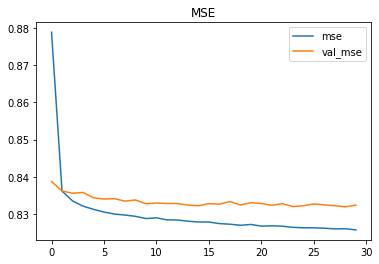

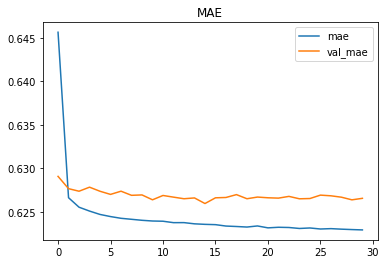

Epoch 1/30
2455/2455 [==============================] - 6s 2ms/step - loss: 0.8711 - mse: 0.8711 - mae: 0.6430 - mape: 126555.2031 - val_loss: 0.8369 - val_mse: 0.8369 - val_mae: 0.6286 - val_mape: 93140.7344
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 2/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8356 - mse: 0.8356 - mae: 0.6262 - mape: 94171.0703 - val_loss: 0.8355 - val_mse: 0.8355 - val_mae: 0.6276 - val_mape: 84452.9844
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 3/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8331 - mse: 0.8331 - mae: 0.6253 - mape: 110760.5781 - val_loss: 0.8352 - val_mse: 0.8352 - val_mae: 0.6278 - val_mape: 108820.5781
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 4/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8319 - mse: 0.8319 - mae: 0.6248 - mape: 111277.8359 - val_loss: 0.8347 - val_mse: 0.8347 - val_mae: 0.6274 - val_mape: 98442.2578
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 5/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8312 - mse: 0.8312 - mae: 0.6246 - mape: 110404.6562 - val_loss: 0.8337 - val_mse: 0.8337 - val_mae: 0.6269 - val_mape: 96124.9844
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 6/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8303 - mse: 0.8303 - mae: 0.6243 - mape: 108870.8516 - val_loss: 0.8347 - val_mse: 0.8347 - val_mae: 0.6271 - val_mape: 127787.4766
Epoch 7/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8299 - mse: 0.8299 - mae: 0.6241 - mape: 112505.5625 - val_loss: 0.8337 - val_mse: 0.8337 - val_mae: 0.6268 - val_mape: 126579.9375
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 8/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8293 - mse: 0.8293 - mae: 0.6240 - mape: 109033.9766 - val_loss: 0.8332 - val_mse: 0.8332 - val_mae: 0.6266 - val_mape: 113266.8438
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 9/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8291 - mse: 0.8291 - mae: 0.6239 - mape: 110327.3516 - val_loss: 0.8332 - val_mse: 0.8332 - val_mae: 0.6262 - val_mape: 123132.6797
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 10/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8289 - mse: 0.8289 - mae: 0.6238 - mape: 111148.9531 - val_loss: 0.8327 - val_mse: 0.8327 - val_mae: 0.6259 - val_mape: 137486.8906
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 11/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8285 - mse: 0.8285 - mae: 0.6237 - mape: 110623.2891 - val_loss: 0.8331 - val_mse: 0.8331 - val_mae: 0.6261 - val_mape: 111899.8906
Epoch 12/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8284 - mse: 0.8284 - mae: 0.6237 - mape: 106068.8672 - val_loss: 0.8326 - val_mse: 0.8326 - val_mae: 0.6265 - val_mape: 138052.8438
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 13/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8284 - mse: 0.8284 - mae: 0.6236 - mape: 105969.5547 - val_loss: 0.8333 - val_mse: 0.8333 - val_mae: 0.6266 - val_mape: 86790.0938
Epoch 14/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8279 - mse: 0.8279 - mae: 0.6235 - mape: 106299.3984 - val_loss: 0.8325 - val_mse: 0.8325 - val_mae: 0.6262 - val_mape: 105316.5938
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 15/30
2455/2455 [==============================] - 5s 2ms/step - loss: 0.8277 - mse: 0.8277 - mae: 0.6235 - mape: 102051.8125 - val_loss: 0.8319 - val_mse: 0.8319 - val_mae: 0.6256 - val_mape: 124183.8047
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 16/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8274 - mse: 0.8274 - mae: 0.6234 - mape: 107439.3984 - val_loss: 0.8318 - val_mse: 0.8318 - val_mae: 0.6259 - val_mape: 118609.5000
INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 17/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8274 - mse: 0.8274 - mae: 0.6234 - mape: 106502.5859 - val_loss: 0.8328 - val_mse: 0.8328 - val_mae: 0.6266 - val_mape: 98210.7266
Epoch 18/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8273 - mse: 0.8273 - mae: 0.6234 - mape: 109073.7422 - val_loss: 0.8324 - val_mse: 0.8324 - val_mae: 0.6262 - val_mape: 110613.9844
Epoch 19/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8270 - mse: 0.8270 - mae: 0.6232 - mape: 105816.8750 - val_loss: 0.8319 - val_mse: 0.8319 - val_mae: 0.6262 - val_mape: 97067.3672
Epoch 20/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8271 - mse: 0.8271 - mae: 0.6233 - mape: 107795.2188 - val_loss: 0.8323 - val_mse: 0.8323 - val_mae: 0.6259 - val_mape: 113607.2031
Epoch 21/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8271 - mse: 0.8271 - mae: 0.6232 - mape: 105495.1562 - val_loss: 0.8324 - val_m

INFO:tensorflow:Assets written to: ../outputs/models/my_simple_nn_4/assets


Epoch 26/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8262 - mse: 0.8262 - mae: 0.6231 - mape: 107744.0156 - val_loss: 0.8321 - val_mse: 0.8321 - val_mae: 0.6261 - val_mape: 116754.9375
Epoch 27/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8261 - mse: 0.8261 - mae: 0.6231 - mape: 108200.8828 - val_loss: 0.8316 - val_mse: 0.8316 - val_mae: 0.6257 - val_mape: 104806.8047
Epoch 28/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8264 - mse: 0.8264 - mae: 0.6231 - mape: 104557.9453 - val_loss: 0.8316 - val_mse: 0.8316 - val_mae: 0.6258 - val_mape: 115114.7578
Epoch 29/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8258 - mse: 0.8258 - mae: 0.6230 - mape: 106342.1250 - val_loss: 0.8315 - val_mse: 0.8315 - val_mae: 0.6260 - val_mape: 99928.5469
Epoch 30/30
2455/2455 [==============================] - 4s 2ms/step - loss: 0.8260 - mse: 0.8260 - mae: 0.6229 - mape: 109069.4297 - val_loss: 0.8315 - val_

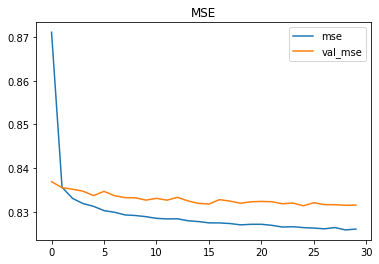

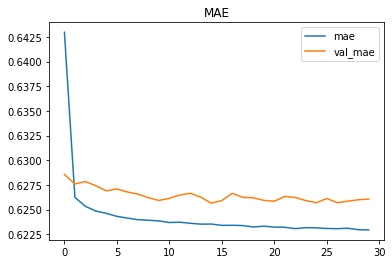

In [80]:
from sklearn.model_selection import KFold, StratifiedKFold

models = []
kfold = KFold(5, shuffle=True, random_state=23)
# kfold = StratifiedKFold(5, shuffle=True, random_state=23)

for i, (train_indices, target_indices) in enumerate(kfold.split(train[features], investment_id)):
    X_train, X_val = train.loc[train_indices, features], train.loc[target_indices, features]
    y_train, y_val = y.loc[train_indices], y.loc[target_indices]
    investment_id_train, investment_id_val = investment_id.loc[train_indices], investment_id.loc[target_indices]
    train_ds = make_dataset(X_train, y_train, investment_id_train)
    val_ds = make_dataset(X_val, y_val, investment_id_val, mode='val')

    model = get_model()
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=get_callbacks(i)
    )
    k.models.load_model(f'../outputs/models/simple_nn_{i}')
    models.append(model)

    pearson_score = stats.pearsonr(model.predict(val_ds).ravel(), y_val.values)
    print('Pearson:', pearson_score)
    pd.DataFrame(history.history, columns=['mse', 'val_mse']).plot()
    plt.title("MSE")
    pd.DataFrame(history.history, columns=['mae', 'val_mae']).plot()
    plt.title("MAE")
    plt.show()
    # break

In [84]:
def eval_models(models):
    test = pd.read_csv('../inputs/dataset/example_test.csv')
    x_test = test[features]
    ss = pd.read_csv('../inputs/dataset/example_sample_submission.csv')
    ss.target = np.mean([model.predict(x_test) for model in models], axis=0)

    return ss


eval_models(models)

,row_id,time_id,target
0,1220_1,1220,-0.040276
1,1220_2,1220,-0.015451
2,1221_0,1221,-0.038039
3,1221_1,1221,-0.029273
4,1221_2,1221,-0.041659
5,1222_0,1222,-0.029919
6,1222_1,1222,-0.032001
7,1222_2,1222,-0.039596
8,1223_0,1223,-0.018495


In [86]:



def preprocess_test(feature):
    return feature, 0

def make_test_dataset(feature, investment_id, batch_size=1024):
#     ds = tf.data.Dataset.from_tensor_slices(((investment_id, feature)))
    ds = tf.data.Dataset.from_tensor_slices(feature)
    ds = ds.map(preprocess_test)
    ds = ds.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)
    return ds

def inference(models, ds):
    y_preds = []
    for model in models:
        y_pred = model.predict(ds)
        y_preds.append(y_pred)
    return np.mean(y_preds, axis=0).ravel()



test_df = pd.read_csv('../inputs/dataset/example_test.csv')
sample_prediction_df = pd.read_csv('../inputs/dataset/example_sample_submission.csv')


ds = make_test_dataset(test_df[features], test_df["investment_id"])
sample_prediction_df['target'] = inference(models, ds)